![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Tokenización de textos  

En este taller podrán poner en práctica sus conocimientos sobre preprocesamiento de texto (tokenización). El taller está constituido por 5 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos detección de toxicidad en comentarios

En este taller se usará el conjunto de datos de detección de toxicidad en comentarios de la base de datos de Kaggle. Cada observación es un comentario que tiene como variable objetivo (target) la probabilidad de ser un comentario tóxico. El objetivo es predecir la toxicidad de cada comentario. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/c/jigsaw-unintended-bias-in-toxicity-classification/data).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importación librerías
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import metrics
%matplotlib inline
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


In [ ]:
# Carga de datos de archivos .csv
df = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/Toxicity.zip')
df = df[['id','comment_text', 'target']]
df.head()

,id,comment_text,target
0,6101457,What are you talking about? What group do Pete...,0.0
1,5342103,"NO!, Let him, we need a Conservative government.",0.0
2,743361,"Perhaps he took the ""power out of the Cardinal...",0.2
3,551008,"As always, yours is dripping with sarcasm, whi...",0.0
4,865998,The dirty little secret is that the price rang...,0.3


In [ ]:
df.shape

(541462, 3)

<Axes: >

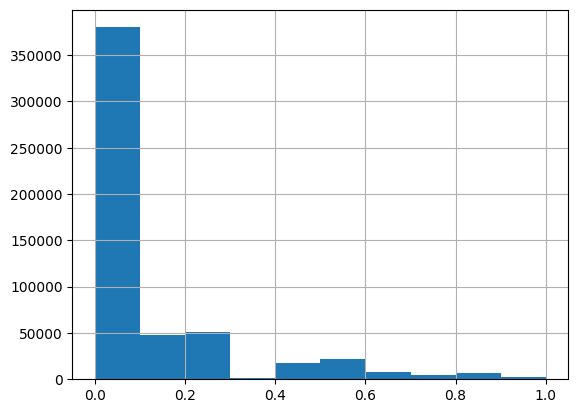

In [ ]:
# Impresión histograma de variable de interés (y)
df.target.hist()

In [ ]:
# Separación de variable de interés (y)
y = df.target
y.describe()

count    541462.000000
mean          0.102991
std           0.196979
min           0.000000
25%           0.000000
50%           0.000000
75%           0.166667
max           1.000000
Name: target, dtype: float64

In [ ]:
# Separación de variables predictoras (X), solo se considera el texto de la noticia
X = df.comment_text

In [ ]:
# Separación de datos en set de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Punto 1 - Tokenización con CountVectorizer

En la celda 1 creen y entrenen el modelo de regresión de su preferencia, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función **CountVectorizer** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 1
#Tokenizacion sin limpieza
vect_1 = CountVectorizer()
X_train_vectorized = vect_1.fit_transform(X_train)
X_test_vectorized = vect_1.transform(X_test)

xgb_model = XGBRegressor()
xgb_model.fit(X_train_vectorized, y_train)

# Predecir en el conjunto de prueba
y_pred = xgb_model.predict(X_test_vectorized)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.020689791583810714


En este punto se creo una tokenizacion sin limpieza, para determinar con un modelo de regresion con XGBoost la probabilidad de que un comentario sea toxico. Utilizando esta metrica se encontro que el MSE para este caso era:

**MSE:** 0.020689791583810714

Por si solo no dice mucho pero es una metrica que mide el promedio de los cuadrados de las diferencias entre los valores predichos y los valores reales. Un MSE más bajo indica un mejor ajuste del modelo a los datos

En este caso en promedio, el cuadrado de la diferencia entre las predicciones del modelo y los valores reales (para un conjunto de datos de prueba) es aproximadamente 0.0207.

## Punto 2 - Tokenización con CountVectorizer y trigramas

En la celda 2 creen y entrenen el mismo modelo de regresión del punto anterior (es decir si usaron un RandomForestRegresor usen nuevamente ese regresor), para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Usen la función CountVectorizer **considerando trigramas** para preprocesar los comentarios y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 2
#Tokenizacion sin limpieza
vect_1 = CountVectorizer(ngram_range=(3, 3))
X_train_vectorized = vect_1.fit_transform(X_train)
X_test_vectorized = vect_1.transform(X_test)

xgb_model = XGBRegressor()
xgb_model.fit(X_train_vectorized, y_train)

# Predecir en el conjunto de prueba
y_pred = xgb_model.predict(X_test_vectorized)

# Calcular el MSE
mse_tri = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse_tri)

Mean Squared Error (MSE): 0.036638869904255585


In [ ]:
0.036638869904255585-0.020689791583810714

0.01594907832044487

Ahora utlizando el mismo regresor, pero usando ahora un CountVectorizer considerando trigramas, es decir tomando hasta 3 tokens para capturar patrones o contextos mas dicilies de ver utilizando solo palabras individuales o bigramas, esto agrega un grado de complejidad al problema y tambien mas tiempo de procesamiento para realizarse, (en este caso tomo mas de 40 minutos en procesar)

En este caso el MSE fue mayor, paso a:

**MSE:**  0.036638869904255585

Una diferencia de tan solo 0.0159 pero que de igual manera empeora

En este caso en promedio, el cuadrado de la diferencia entre las predicciones del modelo y los valores reales (para un conjunto de datos de prueba) es aproximadamente 0.0366.

## Punto 3 - TfidfVectorizer

Investigen sobre la función TfidfVectorizer. En la celda de texto 3, expliquen en qué consiste esta técnica de tokenización (describanla y expliquen su funcionamiento) y cúales son las ventajas o deventajas de su uso al compararlo con la función CountVectorizer.

In [ ]:
# Celda 3


El TfidVectorizer o Term Frequency Inverse Document Frequency, es un algoritmo de transformacion de texto en una representacion con numeros. Usa una transformacion con frecuencias con respecto a un inidce de vocabulario y mide la originalidad de una palabra comparandola con el numero de veces que aparece en el documento o texto dandole asi una ponderacion. Este vectorizador pondera los terminos segun su importancia en el documento, a diferencia de CountVectorizer que simplemente cuenta la frecuencia.

Se puede ver como funciona separando las componentes de su formula:

Term Frequency (TF): : Es una medida de la frecuencia con la que aparece un término (o palabra) en un documento.

TF = Numero de repeticiones de la palabra en el documento/Numero total de palabras en el documento

Inverse Document Frequency (IDF):  Es una medida de cuán importante es un término en un conjunto de documentos.  Se calcula tomando el logaritmo del cociente entre el número total de documentos y el número de documentos que contienen el término de interés, y luego se agrega 1 al denominador para evitar divisiones por cero.

$$\text{IDF} = \log\left(\frac{\text{1 + Número total de documentos}}{\text{1 + Número de documentos que contienen el término}}\right) + 1 $$


CountVectorizer es un metodo más simple que puede tener un buen desempeño en algunas aplicacciones pero a su vez puede no ser tan efectivo como el metodo de TfidfVectorizer cuando se trata de capturar la informacion mas importante en un texto. TfidfVectorizer es mejor que Count Vectorizer porque no solamente se enfoca en la frecuencia de las palabras en el (corpus) si que tambien calcula la importancia de las palabras. Por lo tanto se podrian eliminar las palabras menos importantes para el analisis, lo que hace menos compleja la construcción del modelo al reducir las dimensiones de entrada.

#### **Informacion recuperada de:**
Explicacion:

https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

Scikit learn:

 https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

 Kaggle:

 https://www.kaggle.com/code/zeeshanlatif/countvectorizer-vs-tfidfvectorizer

## Punto 4 - Tokenización con TfidfVectorizer

En la celda 4 creen y entrenen el mismo modelo de regresión del primer punto, para que prediga la probabilidad de que un comentario sea tóxico, usando los set de entrenamiento y test definidos anteriormente. Procesen los comentarios con la función **TfidfVectorizer** y presenten el desempeño del modelo con la métrica del MSE.

Recuerden que el preprocesamiento que se haga sobre los datos de entrenamiento  (*.fit_transform()*) deben ser aplicado al set de test (*.transform()*).

In [ ]:
# Celda 4
vect_2 = TfidfVectorizer()
X_train_Tfidf = vect_2.fit_transform(X_train)
X_test_Tfidf = vect_2.transform(X_test)

xgb_model_Tfidf = XGBRegressor()
xgb_model_Tfidf.fit(X_train_Tfidf, y_train)

# Predecir en el conjunto de prueba
y_pred_Tfidf = xgb_model_Tfidf.predict(X_test_Tfidf)

# Calcular el MSE
mse_Tfidf = mean_squared_error(y_test, y_pred_Tfidf)
print("Mean Squared Error (MSE):", mse_Tfidf)

Mean Squared Error (MSE): 0.020335956149285114


Usando tokenizacion con TfidfVectorizer se puede ver que se obtiene un mejor MSE que con CountVectorizer, pasa de un MSE de 0.02068 a 0.02033 por lo mencionado anteriormente CountVectorizer es un metodo más simple que puede tener un buen desempeño en algunas aplicacciones pero a su vez puede no ser tan efectivo como el metodo de TfidfVectorizer cuando se trata de capturar la informacion mas importante en un texto. TfidfVectorizer es mejor que Count Vectorizer porque no solamente se enfoca en la frecuencia de las palabras en el (corpus) si que tambien calcula la importancia de las palabras.

En este caso en promedio, el cuadrado de la diferencia entre las predicciones del modelo y los valores reales (para un conjunto de datos de prueba) es aproximadamente 0.02033.

## Punto 5 - Comparación y análisis de resultados

En la celda 5 comparen los resultados obtenidos de los diferentes modelos y comenten cómo el preprocesamiento de texto afecta el desempeño.

In [ ]:
# Celda 5
def plot_barh(df, title, xlabel, asc=False):
  ax = (
      df
      .sort_values(by='ejeY', ascending=asc)
      .plot(
          kind='barh', y='ejeY', x='ejeX', color='dodgerblue',
          title=title,
          xlabel=xlabel,
          ylabel=''
      )
  )
  ax.bar_label(ax.containers[0])
  plt.show()

ejeX = ['CountVectorizer', 'CountVectorizer y trigramas','TfidfVectorizer', ]

In [ ]:
#mse = 0.020689791583810714
#mse_tri=0.020677312051006345

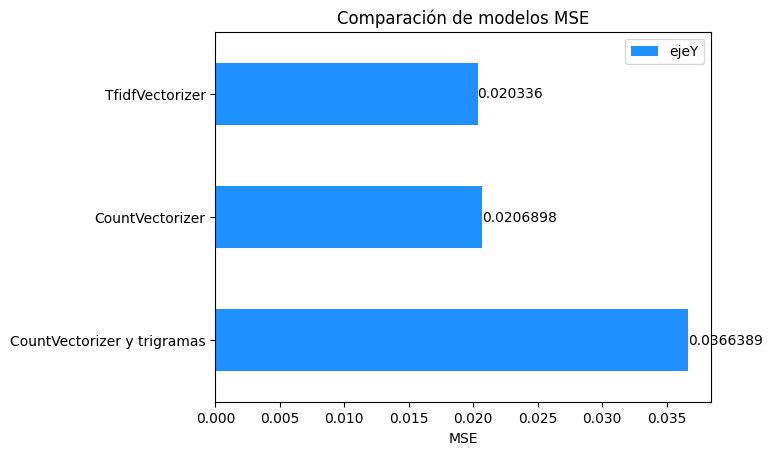

In [ ]:
plot_barh(
    df=pd.DataFrame({'ejeX': ejeX, 'ejeY': [mse,mse_tri, mse_Tfidf]}),
    title='Comparación de modelos MSE',
    xlabel='MSE'
)

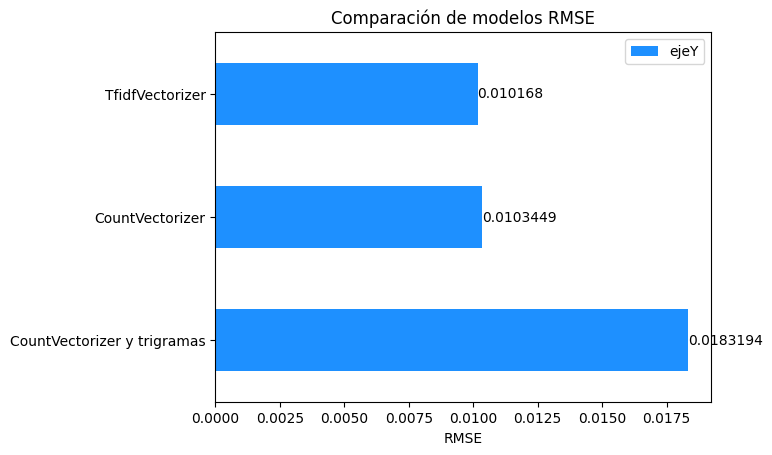

In [ ]:
plot_barh(
    df=pd.DataFrame({'ejeX': ejeX, 'ejeY': [mse**1/2,mse_tri**1/2, mse_Tfidf**1/2]}),
    title='Comparación de modelos RMSE',
    xlabel='RMSE'
)

Se puede ver que el mejor modelo fue el que uso el TF-IDF pues este pondera las palabras según su frecuencia en el documento y en el corpus completo. Esto significa que las palabras más frecuentes en el documento, pero menos frecuentes en el corpus, tendrán una mayor ponderación. Por otro lado, CountVectorizer simplemente cuenta el número de ocurrencias de cada palabra, sin considerar la importancia relativa de las palabras. En este caso, TF-IDF podría estar dando más peso a las características más relevantes, lo que resulta en un mejor rendimiento.

Cuando comparamos CountVectorizer vs CountVectorizer con Trigram podemos ver que la elección de utilizar unigramas (una sola palabra), bigramas (pares de palabras consecutivas) o trigramas (conjuntos de tres palabras consecutivas) también influye en el rendimiento del modelo. Los bigramas y trigramas capturan más información contextual y relaciones entre palabras, lo que puede ser beneficioso en ciertos casos, como el análisis de texto más complejo. Sin embargo, esto también puede aumentar la dimensionalidad del espacio de características, lo que puede llevar a una mayor complejidad computacional y problemas de sobreajuste si no se tiene suficiente cantidad de datos. Por esta razon se podria estar presentando un peor rendimiento cuando se utiliza trigrama en CountVectorizer


En resumen, el preprocesamiento del texto, incluida la selección de técnicas como TF-IDF versus CountVectorizer y la inclusión de unigramas, bigramas o trigramas, puede tener un impacto significativo en el rendimiento de los modelos de procesamiento de lenguaje natural. La elección de la técnica adecuada depende del conjunto de datos específico y del objetivo del análisis.
